In [138]:
import torch 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

path_data = 'C:\\Users\\Evarista\\predictors.csv'
path_target = 'C:\\Users\\Evarista\\outcome.csv'

In [2]:
X = pd.read_csv(path_data)
X = X.drop(['Unnamed: 0'], axis=1)
X.head()


,ext_debt_stocks,inflation_rate,unemployment_rate,mortality_by_1000,resources_rent_procent_of_GDP,military_expenditure_procent_of_GDP,arms_imports,democracy_index,corruption_index,GPD_per_capita,fertility_rate,energy_access_procent_of_population,population,unseat_current_state_head_attempt,trade_openness,state_control_over_territory,political_violence
0,9.064267e+09,11.905040,4.10,6.000,12.000000,1.669214,0.000000,0.290,0.730,7.151485,2.90,0.000000,6.448889,0.0,0.0,0.000,0.000
1,9.156789e+09,-3.233389,4.69,8.750,8.320733,2.606038,16.118096,0.507,0.445,8.480603,5.11,18.374855,7.655126,0.0,5.6,78.167,1.294
2,9.156789e+09,-3.233389,4.69,8.750,8.320733,2.606038,16.118096,0.507,0.445,8.480603,5.11,18.374855,7.655126,0.0,5.6,78.167,1.294
3,9.156789e+09,-3.233389,4.69,8.750,8.320733,2.606038,16.118096,0.507,0.445,8.480603,5.11,18.374855,7.655126,0.0,5.6,78.167,1.294
4,6.882078e+08,7.500000,37.16,13.878,4.627531,2.851928,15.424948,0.289,0.610,5.965382,3.93,0.000000,5.321267,0.0,10.0,79.636,0.733


In [3]:
y = pd.read_csv(path_target)
y = y[['is_conflict']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
y_test.loc[y_test.is_conflict == 0].count()

is_conflict    10
dtype: int64

In [192]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion' : ['gini','entropy'],'max_depth' : range(1,30,3), 
              'min_samples_split': range(2,10,2), 'min_samples_leaf':range(1,10,2)}
gridSClf = GridSearchCV(clf, parameters, cv=10)
gridSClf.fit(X_train, y_train)
print('Best Parameters: ', gridSClf.best_params_)
bestClf = gridSClf.best_estimator_
print('Score with best TRAIN parameters: ', bestClf.score(X_train, y_train))
print('Score with best TEST parameters: ', bestClf.score(X_test, y_test))

pred = bestClf.predict(X_test)

print('Precision: ', precision_score(y_test , pred, average='macro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('ROC score: ', roc_auc_score(y_test, pred))
print('F1 score:', f1_score(y_test, pred))

# tree.plot_tree(bestClf, 
#              feature_names = X.columns,
#              class_names = ['1','0'],
#              filled = True
#          )

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}
Score with best TRAIN parameters:  0.9546599496221663
Score with best TEST parameters:  0.9298245614035088
Precision:  0.6926100628930818
Recall:  0.9298245614035088
ROC score:  0.7282608695652174
F1 score: 0.9625


In [193]:
feature = bestClf.feature_importances_
pd.DataFrame({'VPOFactorsDT': list(X_test), 'ValueOfFactors':feature})\
            .sort_values(by = 'ValueOfFactors', ascending=False)

,VPOFactorsDT,ValueOfFactors
16,political_violence,0.365548
10,fertility_rate,0.204544
3,mortality_by_1000,0.178291
4,resources_rent_procent_of_GDP,0.069431
7,democracy_index,0.064504
9,GPD_per_capita,0.049722
14,trade_openness,0.049554
6,arms_imports,0.012238
5,military_expenditure_procent_of_GDP,0.006168
12,population,0.000000


In [194]:
clfRF = RandomForestClassifier()
parameters = {'n_estimators' : range(3,30,3), 'max_depth' : range(2,10,2),'min_samples_leaf':range(2,10,2),
             'min_samples_split':range(2,10,2)}
gridRF = GridSearchCV(clfRF, parameters, cv=10)
gridRF.fit(X_train, y_train.values.ravel())
print('Best Parameters: ', gridRF.best_params_)
bestRF = gridRF.best_estimator_
print('Score with best TRAIN parameters: ', bestRF.score(X_train, y_train))
print('Score with best TEST parameters: ', bestRF.score(X_test, y_test))

predRF = bestRF.predict(X_test)

print('Precision: ', precision_score(y_test , predRF, average='macro'))
print('Recall: ', recall_score(y_test, predRF, average='micro'))
print('ROC score: ', roc_auc_score( y_test, predRF))
print('F1 score:', f1_score(y_test, predRF))



Best Parameters:  {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3}
Score with best TRAIN parameters:  0.947103274559194
Score with best TEST parameters:  0.9649122807017544
Precision:  0.9015151515151516
Recall:  0.9649122807017544
ROC score:  0.7468944099378882
F1 score: 0.9815950920245399


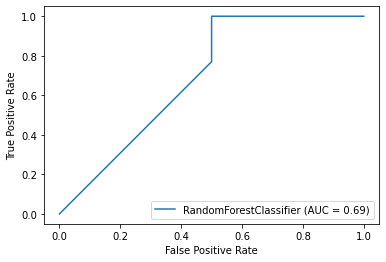

,VPOFactorsRF,ValueOfFactors
10,fertility_rate,0.278684
2,unemployment_rate,0.189056
5,military_expenditure_procent_of_GDP,0.183023
7,democracy_index,0.174641
3,mortality_by_1000,0.174596
0,ext_debt_stocks,0.000000
11,energy_access_procent_of_population,0.000000
15,state_control_over_territory,0.000000
14,trade_openness,0.000000
13,unseat_current_state_head_attempt,0.000000


In [195]:
rfc_disp = plot_roc_curve(bestRF, X_test, y_test)

plt.show()
feature = bestRF.feature_importances_
pd.DataFrame({'VPOFactorsRF': list(X_test), 'ValueOfFactors':feature})\
            .sort_values(by = 'ValueOfFactors', ascending=False)

In [197]:
predRFC = bestRF.predict(X)

print('PrecisionRF: ', precision_score(y , predRFC, average='macro'))
print('RecallRF: ', recall_score(y, predRFC, average='micro'))
print('ROC scoreRF: ', roc_auc_score( y, predRFC))
print('F1 score RF:', f1_score(y, predRFC))

predTC = bestClf.predict(X)

print('\nPrecisionTD: ', precision_score(y , predTC, average='macro'))
print('RecallTD: ', recall_score(y, predTC, average='micro'))
print('ROC scoreTD: ', roc_auc_score(y, predTC))
print('F1 score TD:', f1_score(y, predTC))

PrecisionRF:  0.867979797979798
RecallRF:  0.9524647887323944
ROC scoreRF:  0.6854227108464397
F1 score RF: 0.9750231267345051

PrecisionTD:  0.7871424525630133
RecallTD:  0.9471830985915493
ROC scoreTD:  0.7580292156563343
F1 score TD: 0.971857410881801


In [29]:
X = pd.read_csv(path_data)
X = X.drop(['Unnamed: 0'], axis=1)
X = torch.tensor(X.values.astype(np.float32))

y = pd.read_csv(path_target)
y = y[['is_conflict']]
y = torch.tensor(y.values.astype(np.float32)).reshape(-1)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 42)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
class VpoNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(VpoNet, self).__init__()
        
#         self.incoming = torch.nn.Linear(17, n_hidden_neurons)
#         self.batch1 = torch.nn.BatchNorm1d(n_hidden_neurons)
#         self.activ1 = torch.nn.ReLU()
#         self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons-20)
#         self.batch2 = torch.nn.BatchNorm1d(n_hidden_neurons-20)
#         self.activ2 = torch.nn.ReLU()
#         self.fc3 = torch.nn.Linear(n_hidden_neurons-20,n_hidden_neurons-30)
#         self.batch3 = torch.nn.BatchNorm1d(n_hidden_neurons-30)        
#         self.activ3 = torch.nn.ReLU()
#         self.fc4 = torch.nn.Linear(n_hidden_neurons-30,n_hidden_neurons-40)
#         self.batch4 = torch.nn.BatchNorm1d(n_hidden_neurons-40)        
#         self.activ4 = torch.nn.ReLU()
#         self.fc5 = torch.nn.Linear(n_hidden_neurons-40,n_hidden_neurons-50)
#         self.batch5 = torch.nn.BatchNorm1d(n_hidden_neurons-50)        
#         self.activ5 = torch.nn.ReLU()
#         self.outer = torch.nn.Linear(n_hidden_neurons-50, 1)
#         self.sig = torch.nn.Sigmoid()

        self.incoming = torch.nn.Linear(17, n_hidden_neurons)
        self.batch1 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.activ1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.batch2 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.activ2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.batch3 = torch.nn.BatchNorm1d(n_hidden_neurons)        
        self.activ3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons-20)
        self.batch4 = torch.nn.BatchNorm1d(n_hidden_neurons-20)        
        self.activ4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(n_hidden_neurons-20,n_hidden_neurons-40)
        self.batch5 = torch.nn.BatchNorm1d(n_hidden_neurons-40)        
        self.activ5 = torch.nn.ReLU()
        self.outer = torch.nn.Linear(n_hidden_neurons-40, 1)
        self.sig = torch.nn.Sigmoid()
#         self.sig = torch.nn.Softmax()

    def forward(self, x):
        x = self.incoming(x)
        x = self.batch1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.batch2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.batch3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.batch4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        x = self.batch5(x)
        x = self.activ5(x)        
        x = self.outer(x)
        x = self.sig(x)
        return x
    
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
vpo_net = VpoNet(50)

loss = torch.nn.BCELoss()

optimizer = torch.optim.Adam(vpo_net.parameters(), lr = 0.0003)

batch_size = 30

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        vpo_net.train()        
        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
#         print('x_batch', x_batch)
#         print('y_batch', y_batch)
        preds = vpo_net.forward(x_batch) 
#         print('preds', preds.squeeze(1))
        loss_value = loss(preds.squeeze(1), y_batch)
#         print('loss_value', loss_value)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 200 == 0:
        vpo_net.eval()
        test_preds = vpo_net.forward(X_test).squeeze(1)
#         test_preds = test_preds.argmax(dim=1)
        print('mean', test_preds.mean())

        test_preds = test_preds.detach().apply_(lambda pred: 1. if pred > 0.742 else 0.)
        print('\nEpoch: ', epoch, (test_preds == y_test).float().mean())
        print('Precision: ', precision_score(y_test , test_preds))
        print('Recall: ', recall_score(y_test, test_preds))
        print('ROC score: ', roc_auc_score(y_test, test_preds))
        print('F1 score:', f1_score(y_test, test_preds))
        
        print('test_preds', test_preds)
        print('y_test', y_test)
        cm = confusion_matrix(y_test, test_preds)
        print('tn:', cm[0, 0], 'fp:', cm[0, 1],'fn:', cm[1, 0], 'tp:', cm[1, 1])

mean tensor(0.4927, grad_fn=<MeanBackward0>)

Epoch:  0 tensor(0.0702)
Precision:  1.0
Recall:  0.012422360248447204
ROC score:  0.5062111801242236
F1 score: 0.024539877300613494
test_preds tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
y_test tensor([1., 1., 1., 1., 1., 0., 1., 1.

mean tensor(0.8413, grad_fn=<MeanBackward0>)

Epoch:  1000 tensor(0.7310)
Precision:  0.9259259259259259
Recall:  0.7763975155279503
ROC score:  0.38819875776397517
F1 score: 0.8445945945945945
test_preds tensor([1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1.])
y_test tensor([1., 1., 1., 1.,

mean tensor(0.9307, grad_fn=<MeanBackward0>)
std tensor(0.0948, grad_fn=<StdBackward0>)
min tensor(0.5629, grad_fn=<MinBackward1>)
max tensor(0.9996, grad_fn=<MaxBackward1>)

 tensor(0.9254)  epoch:  1999
Precision:  0.958139534883721
Recall:  0.9626168224299065
ROC score:  0.6598798397863819
F1 score: 0.9603729603729604
tn: 5 fp: 9 fn: 8 tp: 206


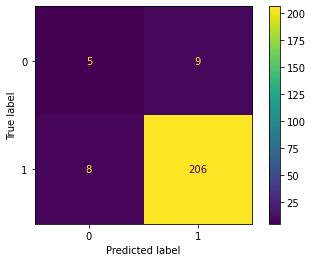

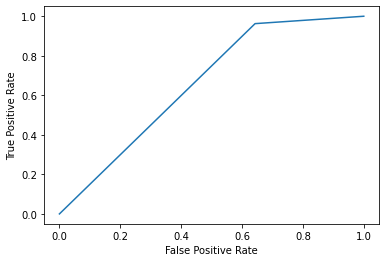

In [141]:
test_preds = vpo_net.forward(X_test).squeeze(1)

# preds = preds.squeeze(1)
# preds
# print('test_preds', test_preds)
# print('y_test', y_test)
print('mean', test_preds.mean())
print('std', test_preds.std())
print('min', test_preds.min())
print('max', test_preds.max())

test_preds = test_preds.detach().apply_(lambda pred: 1. if pred > 0.7 else 0.)
print('\n', (test_preds == y_test).float().mean(), ' epoch: ', epoch)
print('Precision: ', precision_score(y_test , test_preds))
print('Recall: ', recall_score(y_test, test_preds))
print('ROC score: ', roc_auc_score(y_test, test_preds))
print('F1 score:', f1_score(y_test, test_preds))

cm = confusion_matrix(y_test, test_preds)
print('tn:', cm[0, 0], 'fp:', cm[0, 1],'fn:', cm[1, 0], 'tp:', cm[1, 1])
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, _ = roc_curve(y_test, test_preds)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()